https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


_____________________________________________________________

**PREGUNTA**
1. En caso de aplicar un modelo lineal, ¿qué deberíamos emplear; una regresión lineal o logística?



Dado que el target tiene valores entre 0 y 1 deberiamos aplicar la regresion logistica ya que se usa concretamente para problemas de clasificacion binaria. Al aplicar esta regresion el modelo estimará la probabilidad de que un determinado conjunto de características pertenezca a la clase 1 o 0 por lo que puedo establecer un umbral (0,5) para tomar decisiones de clasificación.

In [5]:
target = df['target']
X = df.drop(['target'],axis = 1)


**PREGUNTA**

2. Division Train / Test y Estandarización

*Dividimos en train y test datasets*

In [6]:
'''RELLENAR DIVIDIR LOS DATOS EN TRAIN Y TEST (30% para test)'''
X
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Estandarizamos

In [7]:
'''RELLENAR ESTANDARIZAR LOS DATOS con StandardScaler'''
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler al conjunto de entrenamiento y transformar tanto el conjunto de entrenamiento como el de prueba
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**PREGUNTA**
3. Aplica un método lineal (LogisticRegression)*

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [9]:
'''CREAR Y ENTRENAR MODELO LINEAL'''
#Crear modelo
modelo = LogisticRegression(random_state=42)

# Entrenamos modelo
modelo.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [10]:
y_pred_logistic = modelo.predict(X_test_scaled)

In [11]:
'''RELLENAR CONOCER EL INTERCEPT, LOS COEFICIENTES Y LA EXACTITUD (ACCURACY)'''

intercept = modelo.intercept_[0]
coeficientes = modelo.coef_[0]

print(f'Intercepto: {intercept}\n')
print('Coeficientes:\n')
for caracteristica, coef in zip(X.columns, coeficientes):
    print(f'{caracteristica}: {coef}')

 # Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test_scaled)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)

print(f'La excatitud del modelo es: {accuracy}')

Intercepto: 0.1293365297557228

Coeficientes:

age: 0.027063097038803458
sex: -0.6544419708914148
cp: 0.8390586295286575
trestbps: -0.1430340517849201
chol: -0.12996354463186358
fbs: 0.19647901952707983
restecg: 0.38022578507909655
thalach: 0.3650424418388848
exang: -0.5913192606967957
oldpeak: -0.5060803236858384
slope: 0.5711848345894261
ca: -1.0361398506459183
thal: -0.7363233717670721
La excatitud del modelo es: 0.8131868131868132


**PREGUNTA**
4. ¿Con qué porcentaje de probabilidad asignamos el target 0 a la primera observación?

In [12]:
'''RELLENAR PARA SABER LA PROBABILIDAD A LA QUE PERTENECE CADA MUESTRA A UNA CLASE'''
# Obtener las probabilidades para la clase 0 (target 0) en el conjunto de prueba
probabilities = modelo.predict_proba(X_test_scaled)

In [13]:
# Probabilidad para la primera observación
prob_target_0_first_observation = probabilities[0, 0]
print(f'La probabilidad de que la primera observación tenga el target 0 es: {prob_target_0_first_observation:.4f}')


La probabilidad de que la primera observación tenga el target 0 es: 0.9063


**PREGUNTA**

5. ¿Cuál es la exactitud de la Regresión Logística con regularización Ridge (L2)?

Utiliza: from sklearn.linear_model import RidgeClassifierCV

In [14]:
from sklearn.linear_model import RidgeClassifierCV
import numpy as np

''' INSTANCIA EL MODELO. ENTRÉNALO Y CALCULA LA EXACTITUD (ACCURACY) '''


' INSTANCIA EL MODELO. ENTRÉNALO Y CALCULA LA EXACTITUD (ACCURACY) '

In [15]:
# Creo un objeto StandardScaler y lo ajusto al modelo de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Estandarizar el conjunto de prueba utilizando el scaler ajustado (X_text_scaled) al conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Creo un objeto de regresión logística con regularización Ridge y validación cruzada (L2)
modelo_ridge_cv = RidgeClassifierCV(alphas=[0.1, 1.0, 10.0], cv=5)  # Puedes ajustar la lista de alphas según sea necesario

# Entreno el modelo en los datos estandarizados
modelo_ridge_cv.fit(X_train_scaled, y_train)



RidgeClassifierCV(alphas=[0.1, 1.0, 10.0], cv=5)

In [16]:
# Prediccion en el conjunto de prueba
y_pred_ridge_cv = modelo_ridge_cv.predict(X_test_scaled)

# Calculo la exactitud del modelo
accuracy_ridge_cv = accuracy_score(y_test, y_pred_ridge_cv)

print(f'La exactitud de la Regresión Logística con regularización Ridge (L2) {accuracy_ridge_cv}')
print(f'Mejor valor seleccionado con validación cruzada: {modelo_ridge_cv.alpha_}')

La exactitud de la Regresión Logística con regularización Ridge (L2) 0.8131868131868132
Mejor valor seleccionado con validación cruzada: 10.0


Accuracy con Logistic regression con Lasso

In [17]:
model_lasso = LogisticRegression(penalty='l1', solver='liblinear')
model_lasso.fit(X_train_scaled, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [18]:
print("Accuracy:", model_lasso.score(X_test_scaled, y_test))

Accuracy: 0.8241758241758241


# SVM

*Aplica SVM sobre los datos escalados*

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

'''CREA MODELO SVC, ENTRÉNALO Y CALCULA y_pred_SVM'''
# Creo el modelo
modelo_svc = SVC(kernel='linear', random_state=42)

# Entreno el modelo en los datos estandarizados
modelo_svc.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_svc = modelo_svc.predict(X_test_scaled)
y_pred_svc

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

**PREGUNTA**
6. ¿Qué accuracy obtenemos mediante SVM?

In [20]:
''' CALCULA ACCURACY '''

' CALCULA ACCURACY '

In [21]:
# Calcular la exactitud del modelo SVM en el conjunto de prueba
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f'La exactitud  del modelo con SVM es: {accuracy_svc}')

La exactitud  del modelo con SVM es: 0.8131868131868132


#KNN

**PREGUNTA**

7. Calcula el Accuracy para KNN con K = 5 sobre los datos escalados

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#Creo el modelo
model_knn = KNeighborsClassifier(n_neighbors=5)

# Entreno el modelo en los datos estandarizados
model_knn.fit(X_train_scaled, y_train)

# Predicción en el conjunto de prueba
y_pred_knn = model_knn.predict(X_test_scaled)

# Calculo la exactitud del modelo KNN en el conjunto de prueba
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f'La exactitud del modelo con KNN: {accuracy_knn}')

La exactitud del modelo con KNN: 0.8681318681318682


**PREGUNTA**

8. ¿Para qué valor de K obtenemos mejor exactitud?

In [24]:
# Búsqueda del mejor valor de k
best_k = 0
best_accuracy = 0

for k in range(1, 213):  #  k desde 1 hasta 212
    # Creo modelo
    modelo_knn = KNeighborsClassifier(n_neighbors=k)

    # Entreno el modelo en los datos estandarizados
    modelo_knn.fit(X_train_scaled, y_train)

    # Prediccion en el conjunto de prueba
    y_pred_knn = modelo_knn.predict(X_test_scaled)

    # Calculo la exactitud del modelo KNN en el conjunto de prueba
    accuracy_knn = accuracy_score(y_test, y_pred_knn)

    # Actualizar el mejor valor de k si obtenemos una mejor exactitud
    if accuracy_knn > best_accuracy:
        best_k = k
        best_accuracy = accuracy_knn

print(f'El mejor valor de k es: {best_k}')
print(f'La mejor excatitud con mejor k: {best_accuracy}')

El mejor valor de k es: 5
La mejor excatitud con mejor k: 0.8681318681318682


#Decision Tree

**PREGUNTA**

9. Divide en Train y Test con test al 30%. Hazlo sobre X y no la X escalada. En árboles de decisión no es necesario escalar.

In [25]:
! pip install graphviz

In [26]:
from sklearn import tree
import graphviz

In [31]:
clf = tree.DecisionTreeClassifier(random_state = 10)
# Entrenamos
'''RELLENAR'''
clf.fit(X_train, y_train)

# Prediccion en el conjunto de prueba
y_pred_decision_tree = clf.predict(X_test)


**PREGUNTA**

10. Muestra el Accuracy.

In [33]:
'''OBTENER ACCURACY'''

# Calculo la exactitud del modelo Árbol de Decisión en el conjunto de prueba
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

print(f'El accuracy del modelo Árbol de Decisión: {accuracy_decision_tree:.4f}')


El accuracy del modelo Árbol de Decisión: 0.7582


**PREGUNTA**

11. Muestra el gráfico plot_tree.

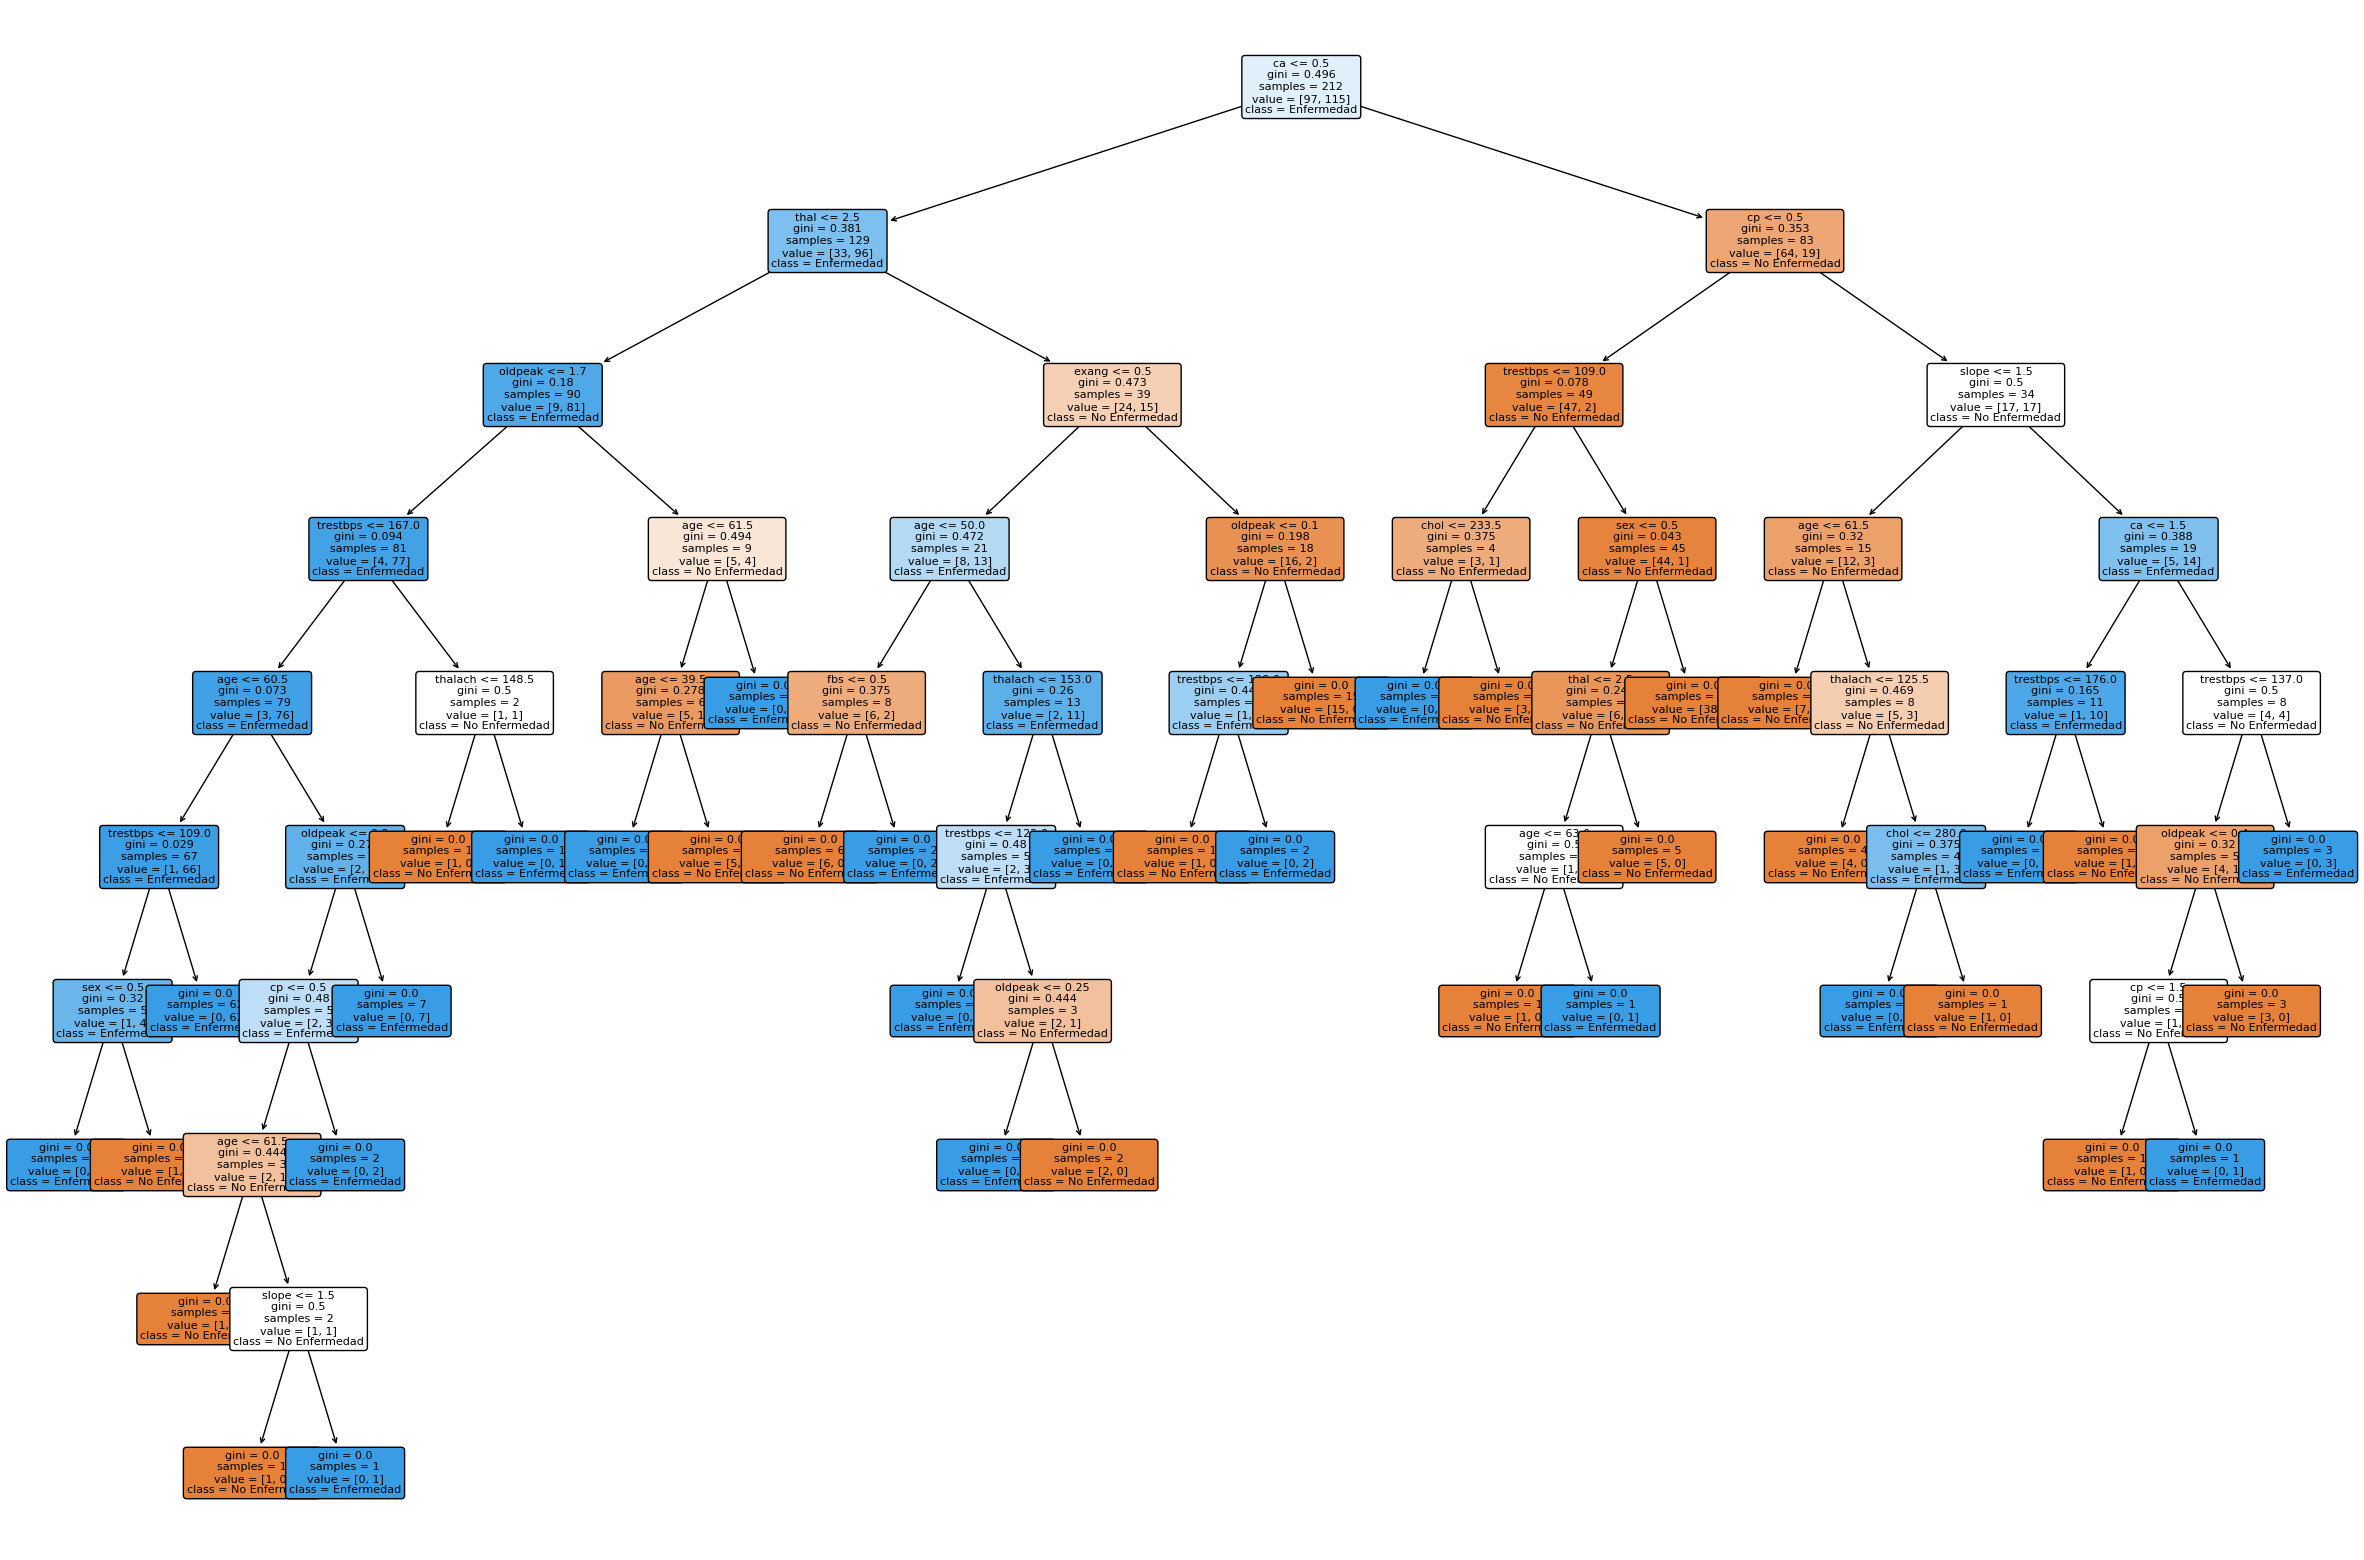

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Etiquetas de clase
class_names = ['No Enfermedad', 'Enfermedad']

# Configurar el tamaño del gráfico
plt.figure(figsize=(30, 20))

# Utilizar plot_tree para visualizar el árbol
plot_tree(clf, filled=True, feature_names=X.columns, class_names= class_names, rounded=True, fontsize=8)

# Mostrar el gráfico
plt.show()
